<a href="https://colab.research.google.com/github/fpr78/DO180-apps/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

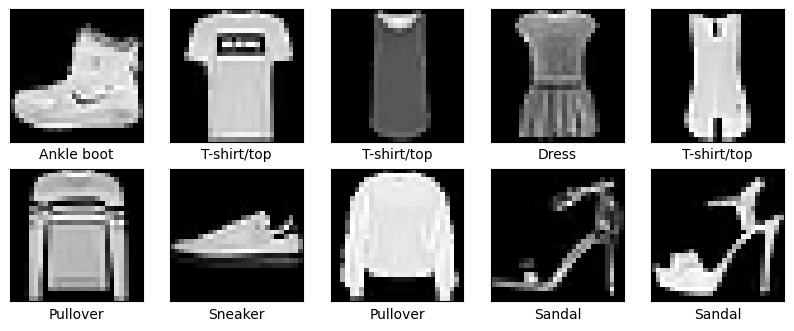

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_names[train_labels[i]])

plt.show()



In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 9s 5ms/step - loss: 0.6323 - accuracy: 0.8387 - val_loss: 0.3570 - val_accuracy: 0.8724
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3041 - accuracy: 0.8889 - val_loss: 0.3385 - val_accuracy: 0.8786
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2600 - accuracy: 0.9038 - val_loss: 0.3177 - val_accuracy: 0.8842
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2297 - accuracy: 0.9139 - val_loss: 0.3121 - val_accuracy: 0.8914
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2071 - accuracy: 0.9223 - val_loss: 0.3356 - val_accuracy: 0.8873
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1887 - accuracy: 0.9294 - val_loss: 0.3205 - val_accuracy: 0.8973
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1742 - accuracy: 0.9340 - val_loss: 0.3177 - val_accuracy: 0.8959
Epoch 

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nAccuracy in test set:', test_acc)

313/313 - 1s - loss: 0.3403 - accuracy: 0.9027 - 650ms/epoch - 2ms/step

Accuracy in test set: 0.9027000069618225


1/1 [==============================] - 0s 237ms/step


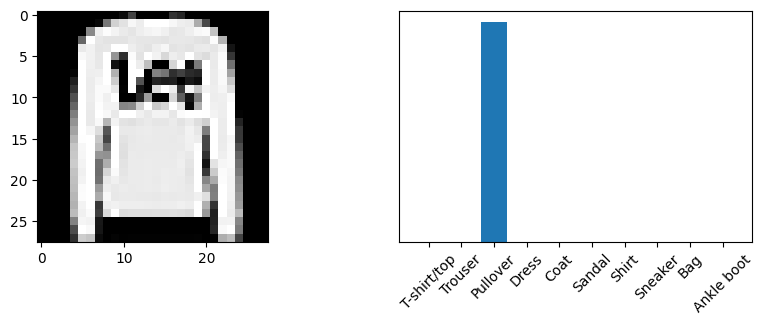

1/1 [==============================] - 0s 17ms/step


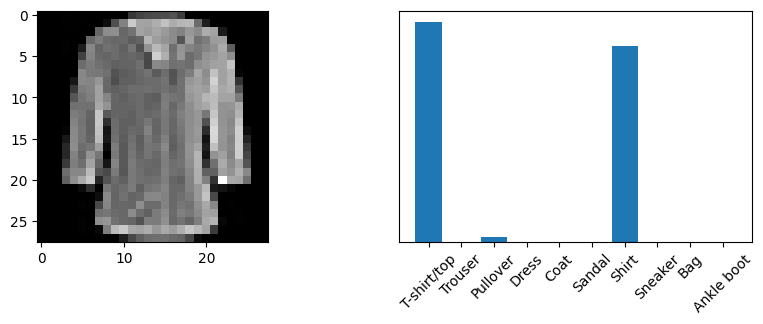

1/1 [==============================] - 0s 17ms/step


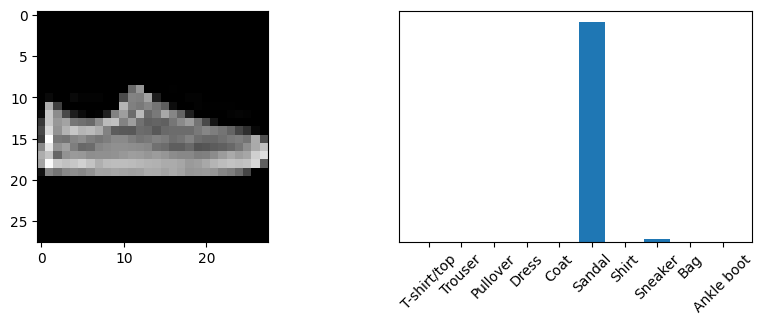

In [6]:
image_list = [1, 4, 12]

for i in image_list:
  img = test_images[i]
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray')

  img = (np.expand_dims(img,0))

  predictions_single = model.predict(img)

  plt.subplot(1,2,2)
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  plt.bar(range(10), predictions_single[0])
  plt.show()